## Hamburger Unternehmen: Fundamentalanalyse

Der HASPAX Index listet 22 börsennotierte Unternehmen aus Hamburg und der nahen Umgebung.
https://www.boersenag.de/Index/DE0008468810/Haspax

Als Fundamentalanalyse bezeichnet man einen Blick auf zentrale wirtschaftliche Kennzahlen. Bei börsennotierten Unternehmen sind diese öffentlich einsehbar. Als Datenquelle in diesem Notebook dient boerse.de. Die Daten greifen wir direkt aus dem HTMl ab.

In [47]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
%matplotlib inline

In [3]:
!pip install lxml

You should consider upgrading via the '/Users/flo/miniconda3/envs/learn-ml/bin/python -m pip install --upgrade pip' command.


In [8]:
# FIXME: missing the German numerical convention ("23,00" is interpreted as `2300` when it should be `23.00` instead)
# Idea: 
# - Use requests.get() instead to load the HTML
# - preprocess the table contents (remove `.` and replace `,` with `.`)
# - pass the html string to pd.read_html()
tables = pd.read_html('https://www.boerse.de/fundamental-analyse/Alstria-Office-REIT--Aktie/DE000A0LD2U1')

In [38]:
# add years to KGV table, because html table is missing the header
tables[7].columns = tables[6].columns
tables[7]

,Unnamed: 0,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,KGV (Kurs-Gewinn-Verhältnis),2300,1810,1870,2190,-,1030,660,400,510
1,KBV (Kurs-Buchwert-Verhältnis),-,-,-,-,116,106,102,81,94
2,KUV (Kurs-Umsatz-Verhältnis),726,720,693,799,1626,900,1025,1120,1586


In [40]:
# verify shapes are compatible for concatenation
for i, tab in enumerate(tables[4:]):
    print(i, tab.shape)

0 (5, 10)
1 (12, 10)
2 (5, 10)
3 (3, 10)
4 (4, 10)
5 (3, 10)


In [54]:
# gewinn_und_verlust = tables[4]
# bilanz = tables[5]
# aktien_kennzahlen = tables[6]
# kgv_kbv_kuv = tables[7]
# rentabilitaet = tables[8]    
# personal = tables[9]
fundamental = pd.concat(tables[4:], ignore_index=True)  # skip first 3 non-data tables 
fundamental = fundamental.rename({'Unnamed: 0': 'Kennzahl'}, axis='columns')
fundamental = fundamental.dropna()
fundamental = fundamental.set_index('Kennzahl')
fundamental


,2011,2012,2013,2014,2015,2016,2017,2018,2019
Kennzahl,,,,,,,,,
Umsatz,91,101,104,102,115,203,194,193,188
Operatives Ergebnis (EBIT),53,78,85,87,-63,247,348,555,608
Ergebnis vor Steuer (EBT),27,40,39,37,-111,194,299,528,580
Jahresüberschuss,27,40,39,37,-111,177,297,527,581
Dividendenausschüttung,35,39,39,43,77,80,80,92,92
Umlaufvermögen,107,140,94,77,552,311,184,178,531
Anlagevermögen,1.579,1.647,1.692,1.692,3.299,3.072,3.400,4.004,4.498
Summe Aktiva,1.687,1.787,1.786,1.769,3.851,3.383,3.584,4.181,5.029
Kurzfristige Verbindlichkeiten,21,28,89,30,449,105,188,91,109


In [56]:
fund_T = fundamental.transpose()
fund_T

Kennzahl,Umsatz,Operatives Ergebnis (EBIT),Ergebnis vor Steuer (EBT),Jahresüberschuss,Dividendenausschüttung,Umlaufvermögen,Anlagevermögen,Summe Aktiva,Kurzfristige Verbindlichkeiten,Langfristige Verbindlichkeiten,...,KGV (Kurs-Gewinn-Verhältnis),KBV (Kurs-Buchwert-Verhältnis),KUV (Kurs-Umsatz-Verhältnis),Umsatzrendite,Eigenkapitalrendite,Gesamtkapitalrendite,Dividendenrendite,Personal am Jahresende,Umsatz je Mitarbeiter,Gewinn je Mitarbeiter
2011,91,53,27,27,35,107,1.579,1.687,21,897,...,2300,-,726,"30,18%",-,"1,62%","4,78%",50,1.815.960,548.000
2012,101,78,40,40,39,140,1.647,1.787,28,930,...,1810,-,720,"39,39%",-,"2,23%","5,41%",59,1.716.949,676.271
2013,104,85,39,39,39,94,1.692,1.786,89,853,...,1870,-,693,"37,33%",-,"2,18%","5,46%",63,1.653.968,617.460
2014,102,87,37,37,43,77,1.692,1.769,30,893,...,2190,-,799,"36,35%",-,"2,09%","4,85%",63,1.615.587,587.302
2015,115,-63,-111,-111,77,552,3.299,3.851,449,1.744,...,-,116,1626,"-96,62%","-6,88%","-2,89%","4,06%",93,1.240.183,-1.197.849
2016,203,247,194,177,80,311,3.072,3.383,105,1.549,...,1030,106,900,"87,27%","10,23%","5,23%","4,37%",105,1.930.124,1.684.762
2017,194,348,299,297,80,184,3.400,3.584,188,1.442,...,660,102,1025,"153,33%","15,19%","8,29%","4,03%",118,1.641.356,2.516.949
2018,193,555,528,527,92,178,4.004,4.181,91,1.406,...,400,81,1120,"272,98%","19,65%","12,61%","4,26%",139,1.389.878,3.794.245
2019,188,608,580,581,92,531,4.498,5.029,109,1.744,...,510,94,1586,"309,97%","18,30%","11,56%","3,10%",156,1.201.712,3.725.641


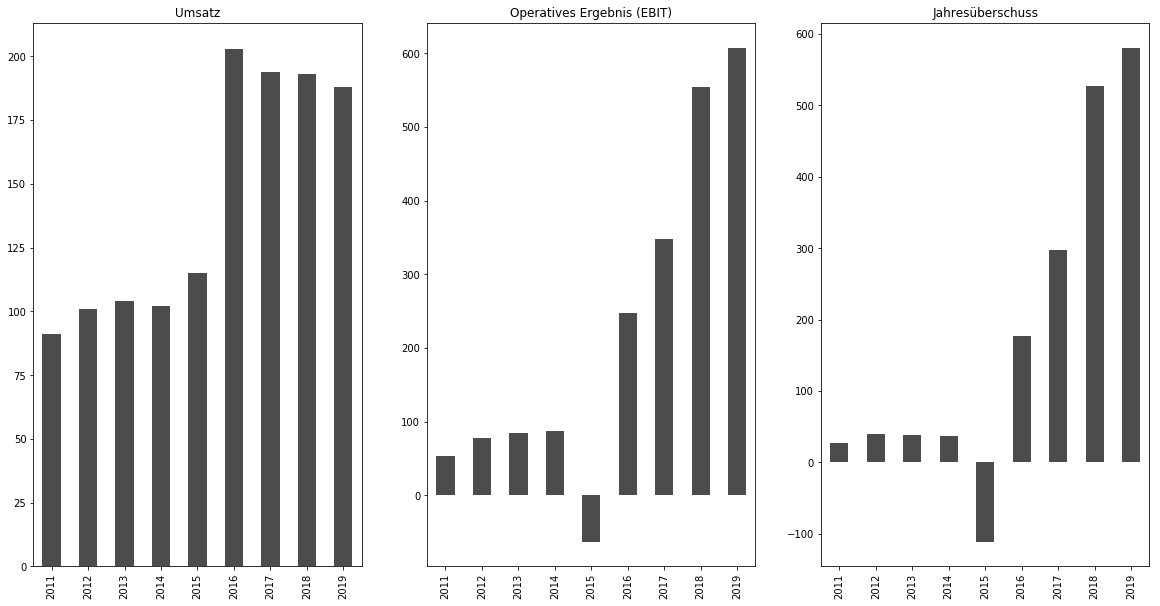

In [72]:
fig, axes = plt.subplots(1, 3, figsize=(20, 10))
for i, kennzahl in enumerate([
        'Umsatz',
        'Operatives Ergebnis (EBIT)',
        'Jahresüberschuss'
    ]):
    
    fund_T[kennzahl].plot.bar(
        ax=axes[i],
        color='k',
        alpha=.7,
        title=kennzahl)